
0: 640x640 1 3, 1 4, 3 arrows, 168.0ms
Speed: 0.0ms preprocess, 168.0ms inference, 13.7ms postprocess per image at shape (1, 3, 640, 640)


['4 405.28350830078125 368.5389709472656 463.18304443359375 421.3974304199219 ', 'down 325.38323974609375 279.84295654296875 379.4267578125 334.27496337890625 ', 'down 329.12847900390625 373.38446044921875 379.92364501953125 424.732666015625 ', 'down 314.69036865234375 198.5634765625 383.51312255859375 233.69305419921875 ', '3 402.0393371582031 278.4329833984375 459.4658508300781 333.3714599609375 ']


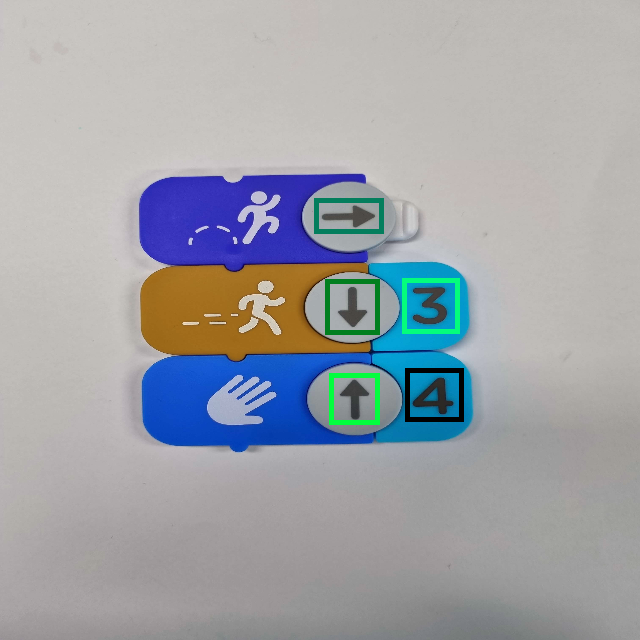

In [10]:
import gradio as gr
import torch
import cv2
import numpy as np
from ultralytics import YOLO

from torchvision import transforms
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms import functional as F


from values import *


MODEL = YOLO("best_ver3.pt")


# 인식된 개체 정보
def inference_image(input_img):
    input_img = cv2.resize(input_img, (640, 640))
    img = transforms.ToTensor()(input_img).unsqueeze(0)

    result = MODEL.predict(img)
    boxes = result[0].boxes
    boxesn = boxes.xyxy

    find_cls = boxes.cls.cpu().detach().numpy()
    fin_conf = boxes.conf.cpu().detach().numpy()
    labels = []

    for cls,(x1, y1, x2, y2) in zip(find_cls, boxesn):
        labels.append(f"{CLASS[int(cls)]} {x1} {y1} {x2} {y2} ")
    print(labels)

    outs = draw_bounding_boxes(torch.from_numpy(input_img.transpose(2, 0,  1)), boxesn, width=5)
    outs = F.to_pil_image(outs.detach())
    return outs

# 불러오려는 사진
img = cv2.imread('./osmo11.jpg')
inference_image(img)
